In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rcParams["patch.force_edgecolor"] = True 
%matplotlib inline 

In [68]:
#look at the head of the data
df=pd.read_csv("Patient_survey__HCAHPS__-_Hospital.csv")
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,H_STAR_RATING,Summary star rating,...,Not Applicable,NaN,Not Applicable,632,NaN,36%,NaN,1/1/2015,12/31/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,...,67,NaN,Not Applicable,632,NaN,36%,NaN,1/1/2015,12/31/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,...,14,NaN,Not Applicable,632,NaN,36%,NaN,1/1/2015,12/31/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,...,19,NaN,Not Applicable,632,NaN,36%,NaN,1/1/2015,12/31/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,...,Not Applicable,NaN,83,632,NaN,36%,NaN,1/1/2015,12/31/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"


In [69]:
#look at info of data. There are a maximum of 264990 entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264990 entries, 0 to 264989
Data columns (total 23 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   Provider ID                            264990 non-null  int64 
 1   Hospital Name                          264990 non-null  object
 2   Address                                264990 non-null  object
 3   City                                   264990 non-null  object
 4   State                                  264990 non-null  object
 5   ZIP Code                               264990 non-null  int64 
 6   County Name                            264165 non-null  object
 7   Phone Number                           264990 non-null  int64 
 8   HCAHPS Measure ID                      264990 non-null  object
 9   HCAHPS Question                        264990 non-null  object
 10  HCAHPS Answer Description              264990 non-null  object
 11  

In [70]:
df["Hospital Name"].nunique()

4617

In [71]:
#Noted that except 3 columns, all are object data type
df.dtypes

Provider ID                               int64
Hospital Name                            object
Address                                  object
City                                     object
State                                    object
ZIP Code                                  int64
County Name                              object
Phone Number                              int64
HCAHPS Measure ID                        object
HCAHPS Question                          object
HCAHPS Answer Description                object
Patient Survey Star Rating               object
Patient Survey Star Rating Footnote      object
HCAHPS Answer Percent                    object
HCAHPS Answer Percent Footnote           object
HCAHPS Linear Mean Value                 object
Number of Completed Surveys              object
Number of Completed Surveys Footnote     object
Survey Response Rate Percent             object
Survey Response Rate Percent Footnote    object
Measure Start Date                      

In [72]:
#Check out the number of unique value in HCAPHS column
df["HCAHPS Question"].unique()

array(['Summary star rating',
       'Patients who reported that their room and bathroom were "Always" clean',
       'Patients who reported that their room and bathroom were "Sometimes" or "Never" clean',
       'Patients who reported that their room and bathroom were "Usually" clean',
       'Cleanliness - linear mean score', 'Cleanliness - star rating',
       'Patients who reported that their nurses "Always" communicated well',
       'Nurse communication - linear mean score',
       'Patients who reported that their nurses "Sometimes" or "Never" communicated well',
       'Nurse communication - star rating',
       'Patients who reported that their nurses "Usually" communicated well',
       'Patients who reported that their doctors "Always" communicated well',
       'Doctor communication - linear mean score',
       'Patients who reported that their doctors "Sometimes" or "Never" communicated well',
       'Doctor communication - star rating',
       'Patients who reported that 

In [73]:
#Select only rows that shows Star rating and name as df1
df1= df[df["HCAHPS Question"].str.contains("star rating")]
#Check the new data frame, it shows only star rating columns. 
df1["HCAHPS Question"].unique()

array(['Summary star rating', 'Cleanliness - star rating',
       'Nurse communication - star rating',
       'Doctor communication - star rating',
       'Staff responsiveness - star rating',
       'Pain management - star rating',
       'Communication about medicines - star rating',
       'Discharge information - star rating',
       'Care transition - star rating',
       'Overall hospital rating - star rating', 'Quietness - star rating',
       'Recommend hospital - star rating'], dtype=object)

In [74]:
df1

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,H_STAR_RATING,Summary star rating,...,Not Applicable,NaN,Not Applicable,632,NaN,36%,NaN,1/1/2015,12/31/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
5,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,H_CLEAN_STAR_RATING,Cleanliness - star rating,...,Not Applicable,NaN,Not Applicable,632,NaN,36%,NaN,1/1/2015,12/31/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
9,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,H_COMP_1_STAR_RATING,Nurse communication - star rating,...,Not Applicable,NaN,Not Applicable,632,NaN,36%,NaN,1/1/2015,12/31/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
14,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,H_COMP_2_STAR_RATING,Doctor communication - star rating,...,Not Applicable,NaN,Not Applicable,632,NaN,36%,NaN,1/1/2015,12/31/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
19,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,H_COMP_3_STAR_RATING,Staff responsiveness - star rating,...,Not Applicable,NaN,Not Applicable,632,NaN,36%,NaN,1/1/2015,12/31/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264962,670112,CUMBERLAND SURGICAL HOSPITAL,5330 NORTH LOOP 1604 WEST,SAN ANTONIO,TX,78249,BEXAR,7176202424,H_COMP_7_STAR_RATING,Care transition - star rating,...,Not Applicable,NaN,Not Applicable,Not Available,5 - Results are not available for this reporti...,NaN,5 - Results are not available for this reporti...,1/1/2015,12/31/2015,"5330 NORTH LOOP 1604 WEST\nSAN ANTONIO, TX 782..."
264973,670112,CUMBERLAND SURGICAL HOSPITAL,5330 NORTH LOOP 1604 WEST,SAN ANTONIO,TX,78249,BEXAR,7176202424,H_RECMND_STAR_RATING,Recommend hospital - star rating,...,Not Applicable,NaN,Not Applicable,Not Available,5 - Results are not available for this reporti...,NaN,5 - Results are not available for this reporti...,1/1/2015,12/31/2015,"5330 NORTH LOOP 1604 WEST\nSAN ANTONIO, TX 782..."
264976,670112,CUMBERLAND SURGICAL HOSPITAL,5330 NORTH LOOP 1604 WEST,SAN ANTONIO,TX,78249,BEXAR,7176202424,H_COMP_3_STAR_RATING,Staff responsiveness - star rating,...,Not Applicable,NaN,Not Applicable,Not Available,5 - Results are not available for this reporti...,NaN,5 - Results are not available for this reporti...,1/1/2015,12/31/2015,"5330 NORTH LOOP 1604 WEST\nSAN ANTONIO, TX 782..."
264980,670112,CUMBERLAND SURGICAL HOSPITAL,5330 NORTH LOOP 1604 WEST,SAN ANTONIO,TX,78249,BEXAR,7176202424,H_QUIET_STAR_RATING,Quietness - star rating,...,Not Applicable,NaN,Not Applicable,Not Available,5 - Results are not available for this reporti...,NaN,5 - Results are not available for this reporti...,1/1/2015,12/31/2015,"5330 NORTH LOOP 1604 WEST\nSAN ANTONIO, TX 782..."


In [75]:
#Check the new data frame, it shows only star rating columns. 
df1["HCAHPS Question"].unique()

array(['Summary star rating', 'Cleanliness - star rating',
       'Nurse communication - star rating',
       'Doctor communication - star rating',
       'Staff responsiveness - star rating',
       'Pain management - star rating',
       'Communication about medicines - star rating',
       'Discharge information - star rating',
       'Care transition - star rating',
       'Overall hospital rating - star rating', 'Quietness - star rating',
       'Recommend hospital - star rating'], dtype=object)

In [76]:
#Check out the number of unique value in Patient Survey star rating. Noted that there are value named: "Not available"
df1["Patient Survey Star Rating"].unique()

array(['3', '2', '4', 'Not Available', '1', '5'], dtype=object)

In [77]:
#Check out the unique values for HCAHPS Answer percent which is mainly for the survey questions. Returned only "non applicable"
#value which is correct
df1["HCAHPS Answer Percent"].unique()

array(['Not Applicable'], dtype=object)

In [78]:
#???Checking for columns with null values, only one column has all null values [HCAHPS Answer Percent], which can be removed.
null_columns=df1.columns[df1.isnull().any()]
df1[null_columns].isnull().sum()

County Name                                180
Patient Survey Star Rating Footnote      42096
HCAHPS Answer Percent Footnote           57816
Number of Completed Surveys Footnote     50892
Survey Response Rate Percent              6948
Survey Response Rate Percent Footnote    41292
dtype: int64

In [79]:
# Exploring all the values available for all columns
for col in df1:
    print(col, ":", df1[col].unique())

Provider ID : [ 10005  10032  10131 ... 670095 670097 670111]
Hospital Name : ['MARSHALL MEDICAL CENTER SOUTH' 'WEDOWEE HOSPITAL'
 'CRESTWOOD MEDICAL CENTER' ... 'LITTLE RIVER HEALTHCARE CAMERON HOSPITAL'
 'EMERUS COMMUNITY HOSPITAL'
 'CONTINUECARE HOSPITAL AT MEDICAL CENTER ODESSA']
Address : ['2505 U S HIGHWAY 431 NORTH' '209 NORTH MAIN STREET' 'ONE HOSPITAL DR SE'
 ... '24429 TOMBALL PARKWAY, SUITE 100' '1975 ALPHA STE 100'
 '500 WEST  4TH STREET , 4TH FLOOR']
City : ['BOAZ' 'WEDOWEE' 'HUNTSVILLE' ... 'ADDISON' 'HARKER HEIGHTS' 'MC KINNEY']
State : ['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'IL' 'IN' 'IA'
 'KS' 'KY' 'LA' 'ME' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV' 'NJ' 'NM'
 'NY' 'NC' 'PA' 'SD' 'ND' 'OH' 'OK' 'OR' 'SC' 'PR' 'RI' 'TN' 'TX' 'WA'
 'WV' 'WI' 'UT' 'VT' 'VI' 'VA' 'WY' 'AS' 'GU' 'MP' 'MD' 'ID' 'DC' 'NH']
ZIP Code : [35957 36278 35801 ... 75146 76520 75087]
County Name : ['MARSHALL' 'RANDOLPH' 'MADISON' ... 'DOOR' 'NATRONA' 'UINTA']
Phone Number : [2565938310 

In [80]:
df2 = df1.drop(["Provider ID", "City", "Phone Number", "HCAHPS Answer Percent", "HCAHPS Answer Percent Footnote",
                        "HCAHPS Linear Mean Value", "Measure Start Date", "Measure End Date", "County Name", "Address", 
                        "Location", "HCAHPS Measure ID", "HCAHPS Answer Description"], axis=1)

df2
#Remove columns that we will not be using for our exploration and name it as df2
#As some hospitals might have the same name, residing in the same City, state, or county.
#Zip code will be retained to ensure that all hospitals are unique

,Hospital Name,State,ZIP Code,HCAHPS Question,Patient Survey Star Rating,Patient Survey Star Rating Footnote,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote
0,MARSHALL MEDICAL CENTER SOUTH,AL,35957,Summary star rating,3,NaN,632,NaN,36%,NaN
5,MARSHALL MEDICAL CENTER SOUTH,AL,35957,Cleanliness - star rating,2,NaN,632,NaN,36%,NaN
9,MARSHALL MEDICAL CENTER SOUTH,AL,35957,Nurse communication - star rating,3,NaN,632,NaN,36%,NaN
14,MARSHALL MEDICAL CENTER SOUTH,AL,35957,Doctor communication - star rating,4,NaN,632,NaN,36%,NaN
19,MARSHALL MEDICAL CENTER SOUTH,AL,35957,Staff responsiveness - star rating,3,NaN,632,NaN,36%,NaN
...,...,...,...,...,...,...,...,...,...,...
264962,CUMBERLAND SURGICAL HOSPITAL,TX,78249,Care transition - star rating,Not Available,5 - Results are not available for this reporti...,Not Available,5 - Results are not available for this reporti...,NaN,5 - Results are not available for this reporti...
264973,CUMBERLAND SURGICAL HOSPITAL,TX,78249,Recommend hospital - star rating,Not Available,5 - Results are not available for this reporti...,Not Available,5 - Results are not available for this reporti...,NaN,5 - Results are not available for this reporti...
264976,CUMBERLAND SURGICAL HOSPITAL,TX,78249,Staff responsiveness - star rating,Not Available,5 - Results are not available for this reporti...,Not Available,5 - Results are not available for this reporti...,NaN,5 - Results are not available for this reporti...
264980,CUMBERLAND SURGICAL HOSPITAL,TX,78249,Quietness - star rating,Not Available,5 - Results are not available for this reporti...,Not Available,5 - Results are not available for this reporti...,NaN,5 - Results are not available for this reporti...


In [81]:
df2["Patient Survey Star Rating"].unique()

array(['3', '2', '4', 'Not Available', '1', '5'], dtype=object)

In [82]:
df2["Patient Survey Star Rating"].value_counts()

Not Available    15720
3                15388
4                13096
2                 8201
5                 3344
1                 2067
Name: Patient Survey Star Rating, dtype: int64

In [83]:
df2a = df2[df2["Patient Survey Star Rating"].isin(["Not Available"])]

In [84]:
df2a["Patient Survey Star Rating Footnote"].value_counts()

15 - The number of cases/patients is too few to report a star rating.                                                                                8796
5 - Results are not available for this reporting period.                                                                                             4944
19 - Data are shown only for hospitals that participate in the Inpatient Quality Reporting (IQR) and Outpatient Quality Reporting (OQR) programs.    1980
Name: Patient Survey Star Rating Footnote, dtype: int64

In [85]:
#Remove rows containing "N.A" in patient survey star rating and name it df3
df3= df2[~df2["Patient Survey Star Rating"].isin(["Not Available"])]
df3["Patient Survey Star Rating"].value_counts()

3    15388
4    13096
2     8201
5     3344
1     2067
Name: Patient Survey Star Rating, dtype: int64

In [86]:
#Check out the value of PSSR and not that value 3 is the highest rating and there is no longer any "Not available" values
df3["Patient Survey Star Rating"].value_counts()

3    15388
4    13096
2     8201
5     3344
1     2067
Name: Patient Survey Star Rating, dtype: int64

In [87]:
df3.isnull().any()

Hospital Name                            False
State                                    False
ZIP Code                                 False
HCAHPS Question                          False
Patient Survey Star Rating               False
Patient Survey Star Rating Footnote       True
Number of Completed Surveys              False
Number of Completed Surveys Footnote      True
Survey Response Rate Percent              True
Survey Response Rate Percent Footnote     True
dtype: bool

In [88]:
df3["Patient Survey Star Rating Footnote"].unique()

array([nan], dtype=object)

In [89]:
df3["Number of Completed Surveys Footnote"].unique()

array([nan], dtype=object)

In [90]:
df3["Survey Response Rate Percent Footnote"].value_counts()

11 - There were discrepancies in the data collection process.                                                                   720
3 - Results are based on a shorter time period than required., 11 - There were discrepancies in the data collection process.     72
5 - Results are not available for this reporting period.                                                                         12
Name: Survey Response Rate Percent Footnote, dtype: int64

In [91]:
#check out all unique values in all columns of df 3
for col in df3:
    print(col, ":", df3[col].unique())

Hospital Name : ['MARSHALL MEDICAL CENTER SOUTH' 'CRESTWOOD MEDICAL CENTER'
 'PROVIDENCE ALASKA MEDICAL CENTER' ...
 'BAYLOR SCOTT AND WHITE  MEDICAL CENTER  MCKINNEY'
 'WALNUT HILL MEDICAL CENTER' 'BAY AREA REGIONAL MEDICAL CENTER, LLC']
State : ['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'IL' 'IN' 'IA'
 'KS' 'KY' 'LA' 'ME' 'MA' 'MI' 'MN' 'MS' 'MO' 'NE' 'NV' 'NJ' 'NM' 'NY'
 'NC' 'PA' 'SD' 'ND' 'OH' 'OK' 'OR' 'SC' 'RI' 'TN' 'TX' 'WA' 'WV' 'WI'
 'UT' 'VT' 'VI' 'VA' 'WY' 'MD' 'ID' 'DC' 'MT' 'NH']
ZIP Code : [35957 35801 99508 ... 76244 76548 75071]
HCAHPS Question : ['Summary star rating' 'Cleanliness - star rating'
 'Nurse communication - star rating' 'Doctor communication - star rating'
 'Staff responsiveness - star rating' 'Pain management - star rating'
 'Communication about medicines - star rating'
 'Discharge information - star rating' 'Care transition - star rating'
 'Overall hospital rating - star rating' 'Quietness - star rating'
 'Recommend hospital - star rating']


In [92]:
#dropped 2 more columns that contains null values
df4 = df3.drop(["Patient Survey Star Rating Footnote", "Number of Completed Surveys Footnote"], axis=1)
df4

,Hospital Name,State,ZIP Code,HCAHPS Question,Patient Survey Star Rating,Number of Completed Surveys,Survey Response Rate Percent,Survey Response Rate Percent Footnote
0,MARSHALL MEDICAL CENTER SOUTH,AL,35957,Summary star rating,3,632,36%,NaN
5,MARSHALL MEDICAL CENTER SOUTH,AL,35957,Cleanliness - star rating,2,632,36%,NaN
9,MARSHALL MEDICAL CENTER SOUTH,AL,35957,Nurse communication - star rating,3,632,36%,NaN
14,MARSHALL MEDICAL CENTER SOUTH,AL,35957,Doctor communication - star rating,4,632,36%,NaN
19,MARSHALL MEDICAL CENTER SOUTH,AL,35957,Staff responsiveness - star rating,3,632,36%,NaN
...,...,...,...,...,...,...,...,...
264714,MEDICAL CENTER OF ALLIANCE,TX,76177,Nurse communication - star rating,4,257,20%,NaN
264724,MEDICAL CENTER OF ALLIANCE,TX,76177,Quietness - star rating,4,257,20%,NaN
264725,MEDICAL CENTER OF ALLIANCE,TX,76177,Care transition - star rating,3,257,20%,NaN
264743,MEDICAL CENTER OF ALLIANCE,TX,76177,Recommend hospital - star rating,4,257,20%,NaN


In [93]:
#Check the value counts for SRRPF column
df4["Survey Response Rate Percent Footnote"].value_counts()

11 - There were discrepancies in the data collection process.                                                                   720
3 - Results are based on a shorter time period than required., 11 - There were discrepancies in the data collection process.     72
5 - Results are not available for this reporting period.                                                                         12
Name: Survey Response Rate Percent Footnote, dtype: int64

In [94]:
total = 42096
unreliable = (720+72+12)
pct_of_total = unreliable/total*100

print("There are %d rows of data which has footnote suggesting that the data is not reliable." %(unreliable))
print("This takes up about %5.2F percent of the data." %(pct_of_total))


There are 804 rows of data which has footnote suggesting that the data is not reliable.
This takes up about  1.91 percent of the data.


In [95]:
# Select only values without footnote
df5= df4[df4["Survey Response Rate Percent Footnote"].isnull()]
df5

,Hospital Name,State,ZIP Code,HCAHPS Question,Patient Survey Star Rating,Number of Completed Surveys,Survey Response Rate Percent,Survey Response Rate Percent Footnote
0,MARSHALL MEDICAL CENTER SOUTH,AL,35957,Summary star rating,3,632,36%,NaN
5,MARSHALL MEDICAL CENTER SOUTH,AL,35957,Cleanliness - star rating,2,632,36%,NaN
9,MARSHALL MEDICAL CENTER SOUTH,AL,35957,Nurse communication - star rating,3,632,36%,NaN
14,MARSHALL MEDICAL CENTER SOUTH,AL,35957,Doctor communication - star rating,4,632,36%,NaN
19,MARSHALL MEDICAL CENTER SOUTH,AL,35957,Staff responsiveness - star rating,3,632,36%,NaN
...,...,...,...,...,...,...,...,...
264714,MEDICAL CENTER OF ALLIANCE,TX,76177,Nurse communication - star rating,4,257,20%,NaN
264724,MEDICAL CENTER OF ALLIANCE,TX,76177,Quietness - star rating,4,257,20%,NaN
264725,MEDICAL CENTER OF ALLIANCE,TX,76177,Care transition - star rating,3,257,20%,NaN
264743,MEDICAL CENTER OF ALLIANCE,TX,76177,Recommend hospital - star rating,4,257,20%,NaN


In [97]:
df5.isnull().any()

Hospital Name                            False
State                                    False
ZIP Code                                 False
HCAHPS Question                          False
Patient Survey Star Rating               False
Number of Completed Surveys              False
Survey Response Rate Percent             False
Survey Response Rate Percent Footnote     True
dtype: bool

In [ ]:
hospital_dummy = pd.get_dummies(df5)

In [31]:
#pivoting wide on Patient Survey Star rating
df6= pd.pivot_table(df5, index= ["Hospital Name", "State", "ZIP Code", "Survey Response Rate Percent", 
                                 "Number of Completed Surveys"], columns = ["HCAHPS Question"], 
                    values= ["Patient Survey Star Rating"], aggfunc=sum)

#Readjust the data frame to have only a single header row
df7 = pd.DataFrame(df6.to_records())
df7

,Hospital Name,State,ZIP Code,Survey Response Rate Percent,Number of Completed Surveys,"('Patient Survey Star Rating', 'Care transition - star rating')","('Patient Survey Star Rating', 'Cleanliness - star rating')","('Patient Survey Star Rating', 'Communication about medicines - star rating')","('Patient Survey Star Rating', 'Discharge information - star rating')","('Patient Survey Star Rating', 'Doctor communication - star rating')","('Patient Survey Star Rating', 'Nurse communication - star rating')","('Patient Survey Star Rating', 'Overall hospital rating - star rating')","('Patient Survey Star Rating', 'Pain management - star rating')","('Patient Survey Star Rating', 'Quietness - star rating')","('Patient Survey Star Rating', 'Recommend hospital - star rating')","('Patient Survey Star Rating', 'Staff responsiveness - star rating')","('Patient Survey Star Rating', 'Summary star rating')"
0,ABBEVILLE AREA MEDICAL CENTER,SC,29620,29%,123,4,4,5,3,5,5,5,4,5,5,5,5
1,ABBEVILLE GENERAL HOSPITAL,LA,70510,15%,129,3,4,4,3,5,4,3,4,5,2,4,4
2,ABBOTT NORTHWESTERN HOSPITAL,MN,55407,39%,1018,4,3,4,4,4,4,4,4,3,5,4,4
3,ABILENE REGIONAL MEDICAL CENTER,TX,79606,29%,625,2,2,3,3,3,3,3,2,3,3,2,3
4,ABINGTON MEMORIAL HOSPITAL,PA,19001,27%,536,2,2,3,3,3,4,3,3,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,YORK GENERAL HOSPITAL,NE,68467,39%,221,4,5,5,3,5,4,4,4,3,4,4,4
3437,YORK HOSPITAL,ME,3909,35%,508,4,4,4,4,4,5,5,4,3,5,3,4
3438,YORK HOSPITAL,PA,17403,32%,535,2,2,2,3,2,3,3,3,2,3,3,3
3439,YUKON KUSKOKWIM DELTA REG HOSPITAL,AK,99559,31%,276,1,1,4,3,3,3,2,1,3,2,2,2


In [32]:
# As the default column name is too long, they will be renamed for better readability 
df7.columns = ["Hospital name", "State", "Zip code", 'Survey response percent', 'Number of completed surveys','Care transition',
                     'Cleanliness', 'Communication about medicines', 'Discharge information', 'Doctor communication',
                    'Nurse communication', 'Overall hospital Rating', 'Pain management','Quietness','Recommend hospital',
                     'Staff responsiveness', 'Summary']
df7.head()

,Hospital name,State,Zip code,Survey response percent,Number of completed surveys,Care transition,Cleanliness,Communication about medicines,Discharge information,Doctor communication,Nurse communication,Overall hospital Rating,Pain management,Quietness,Recommend hospital,Staff responsiveness,Summary
0,ABBEVILLE AREA MEDICAL CENTER,SC,29620,29%,123,4,4,5,3,5,5,5,4,5,5,5,5
1,ABBEVILLE GENERAL HOSPITAL,LA,70510,15%,129,3,4,4,3,5,4,3,4,5,2,4,4
2,ABBOTT NORTHWESTERN HOSPITAL,MN,55407,39%,1018,4,3,4,4,4,4,4,4,3,5,4,4
3,ABILENE REGIONAL MEDICAL CENTER,TX,79606,29%,625,2,2,3,3,3,3,3,2,3,3,2,3
4,ABINGTON MEMORIAL HOSPITAL,PA,19001,27%,536,2,2,3,3,3,4,3,3,1,3,3,3


In [33]:
df7["Overall hospital Rating"].value_counts()

4    1630
3    1005
2     390
5     328
1      88
Name: Overall hospital Rating, dtype: int64

In [34]:
1630+1005+390+328+88

88/3441

0.025573961057832027

In [35]:
1630/3441

0.4736995059575705

4    1630
3    1005
2     390
5     328
1      88
Name: Overall hospital Rating, dtype: int64


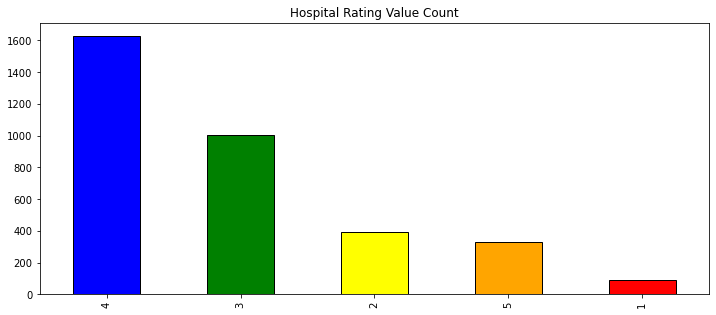

In [36]:
#Show distribution of hospital rating
plt.figure(figsize = (12,5))
hosp_dist = df7["Overall hospital Rating"].value_counts()
hosp_dist.plot.bar(title = "Hospital Rating Value Count", color = ["blue", "green", "yellow", "orange", "red"])

print(df7["Overall hospital Rating"].value_counts())

In [37]:
df7["Recommend hospital"].value_counts()

3    1174
4    1123
2     631
5     273
1     240
Name: Recommend hospital, dtype: int64

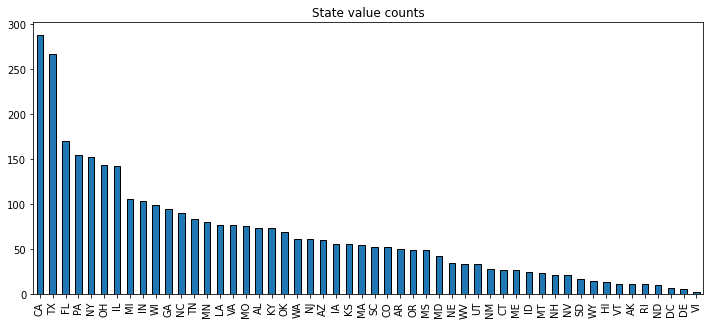

In [38]:
#Show distribution

plt.figure(figsize = (12,5))
state_count=df7["State"].value_counts()
state_count.plot.bar(title = "State value counts")

In [39]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Hospital name                  3441 non-null   object
 1   State                          3441 non-null   object
 2   Zip code                       3441 non-null   int32 
 3   Survey response percent        3441 non-null   object
 4   Number of completed surveys    3441 non-null   object
 5   Care transition                3441 non-null   object
 6   Cleanliness                    3441 non-null   object
 7   Communication about medicines  3441 non-null   object
 8   Discharge information          3441 non-null   object
 9   Doctor communication           3441 non-null   object
 10  Nurse communication            3441 non-null   object
 11  Overall hospital Rating        3441 non-null   object
 12  Pain management                3441 non-null   object
 13  Qui

In [40]:
for col in df7.columns[4:]:
    if df7[col].dtypes == "O":
        df7[col] = df7[col].astype('int')

In [41]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Hospital name                  3441 non-null   object
 1   State                          3441 non-null   object
 2   Zip code                       3441 non-null   int32 
 3   Survey response percent        3441 non-null   object
 4   Number of completed surveys    3441 non-null   int32 
 5   Care transition                3441 non-null   int32 
 6   Cleanliness                    3441 non-null   int32 
 7   Communication about medicines  3441 non-null   int32 
 8   Discharge information          3441 non-null   int32 
 9   Doctor communication           3441 non-null   int32 
 10  Nurse communication            3441 non-null   int32 
 11  Overall hospital Rating        3441 non-null   int32 
 12  Pain management                3441 non-null   int32 
 13  Qui

In [42]:
df7["Survey response percent"] = df7["Survey response percent"].str.rstrip('%').astype('float')/100

In [43]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Hospital name                  3441 non-null   object 
 1   State                          3441 non-null   object 
 2   Zip code                       3441 non-null   int32  
 3   Survey response percent        3441 non-null   float64
 4   Number of completed surveys    3441 non-null   int32  
 5   Care transition                3441 non-null   int32  
 6   Cleanliness                    3441 non-null   int32  
 7   Communication about medicines  3441 non-null   int32  
 8   Discharge information          3441 non-null   int32  
 9   Doctor communication           3441 non-null   int32  
 10  Nurse communication            3441 non-null   int32  
 11  Overall hospital Rating        3441 non-null   int32  
 12  Pain management                3441 non-null   i

In [44]:
df7.describe()

,Zip code,Survey response percent,Number of completed surveys,Care transition,Cleanliness,Communication about medicines,Discharge information,Doctor communication,Nurse communication,Overall hospital Rating,Pain management,Quietness,Recommend hospital,Staff responsiveness,Summary
count,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000
mean,52057.274629,0.286083,880.023249,2.659692,2.868062,3.093577,3.367044,3.238303,3.546062,3.499855,3.166812,3.019471,3.162162,3.326359,3.220575
std,27554.937141,0.081802,969.673633,1.023631,1.003207,0.906993,0.890751,1.043055,0.924308,0.906092,0.806631,1.097526,1.039274,1.026183,0.841438
min,801.000000,0.070000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,30309.000000,0.240000,320.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000
50%,49849.000000,0.280000,552.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,75751.000000,0.330000,1065.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99901.000000,0.880000,13280.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


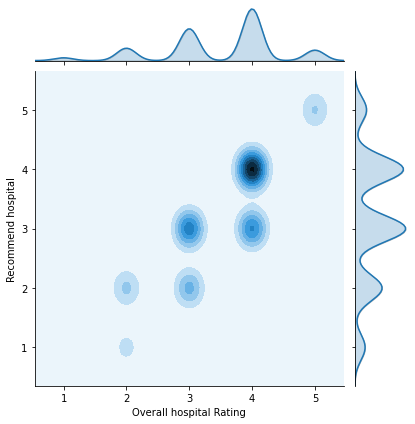

In [45]:
sns.jointplot(x = "Overall hospital Rating", y = "Recommend hospital", data= df7, kind = "kde")

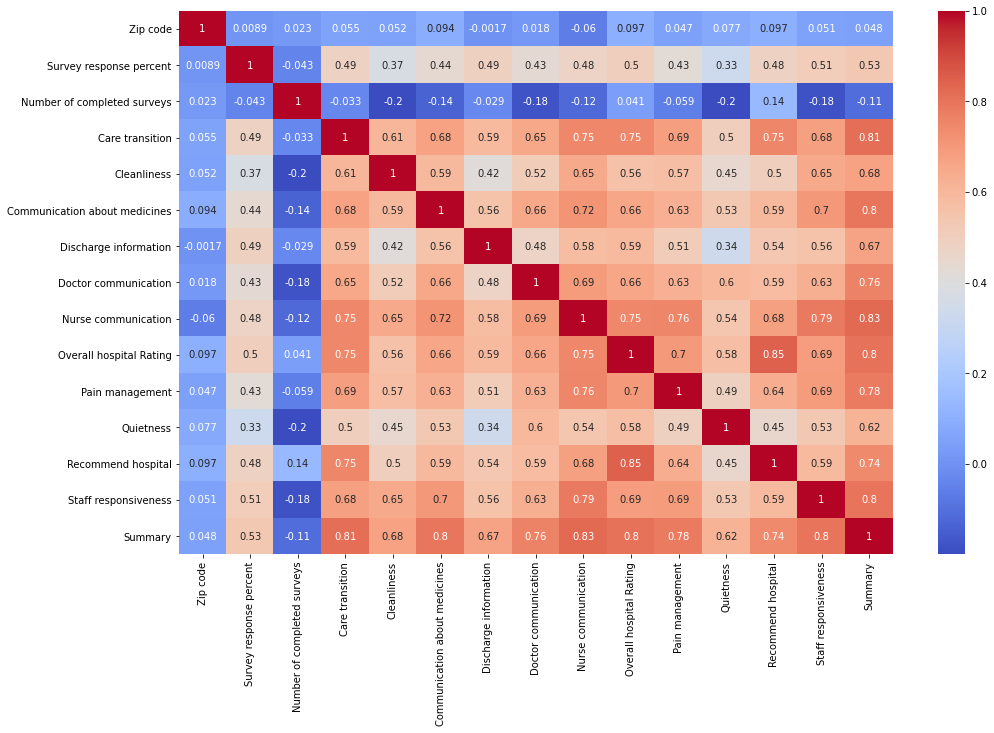

In [46]:
#Plot a correlation chart 
plt.figure(figsize = (16,10))
sns.heatmap(df7.corr(), annot=True, cmap = "coolwarm")

In [47]:
df7.to_csv("eca_hosp1.csv", index = False)

In [48]:
df7["Overall hospital Rating"].value_counts()

4    1630
3    1005
2     390
5     328
1      88
Name: Overall hospital Rating, dtype: int64

# Machine learning starts 
Target = Recommend

Contains = summary, overall rating

In [49]:
# from sklearn.model_selection import train_test_split

In [50]:
# X = df8.drop("Recommend hospital", axis=1)
# y = df8["Recommend hospital"]

In [51]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision Trees

We'll start by training a single decision tree



In [52]:
# from sklearn.tree import DecisionTreeClassifier

In [53]:
# dtree= DecisionTreeClassifier()

In [54]:
# dtree.fit(X_train, y_train)

# Prediction and Evaluation

In [55]:
# predictions = dtree.predict(X_test)

In [56]:
# from sklearn.metrics import classification_report,confusion_matrix

In [57]:
# print(classification_report(y_test,predictions))

In [58]:
# print(confusion_matrix(y_test,predictions))

In [59]:
# from IPython.display import Image  
# from six import StringIO  
# from sklearn.tree import export_graphviz
# import pydot 

# features = list(df8.columns[1:])
# features

In [60]:
# dot_data = StringIO()  
# export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

# graph = pydot.graph_from_dot_data(dot_data.getvalue())  
# Image(graph[0].create_png())  

In [61]:
# from sklearn.ensemble import RandomForestClassifier
# rfc= RandomForestClassifier(n_estimators=100)
# rfc.fit(X_train, y_train)

In [62]:
# rfc_pred = rfc.predict(X_test)

In [63]:
# print(confusion_matrix(y_test,rfc_pred))

In [64]:
# print(classification_report(y_test,rfc_pred))

In [65]:
# df8

In [66]:
#Hospital that performed well = 1
#hospital that performed average or below = 0

df9 = df8

NameError: name 'df8' is not defined

In [ ]:
# Create a new column called performance and drop overall rating. 
df7["Performance"] = np.where(df7["Overall hospital Rating"] < 4, 0, np.where(
df7["Overall hospital Rating"]>= 4, 1, -1))
df8 = df7.drop(["Overall hospital Rating"], axis=1)

#Performance only have 2 values
plt.figure(figsize = (12,5))
hosp_dist1 = df8["Performance"].value_counts()
hosp_dist1.plot.bar(title = "Performance", color = ["blue", "orange"])
print(df8["Performance"].value_counts())

In [ ]:
1958/(1958+1483)

In [ ]:
1483/(1958+1483)

In [ ]:
df8

In [ ]:
sns.countplot(x = "Care transition", hue="Performance", data = df8)

In [ ]:
sns.countplot(x = "Staff responsiveness", hue="Performance", data = df8)

In [ ]:
sns.countplot(x = "Doctor communication", hue="Performance", data = df8)

In [ ]:
sns.countplot(x = "Nurse communication", hue="Performance", data = df8)

In [ ]:
fig, ax = plt.subplots(ncols = 3, figsize =(18,6) )
fig = plt.gcf()

sns.countplot(x = "Care transition", hue="Performance", data = df8, ax = ax[0])
sns.countplot(x = "Staff responsiveness", hue="Performance", data = df8, ax = ax[1])
sns.countplot(x = "Doctor communication", hue="Performance", data = df8, ax= ax[2])

In [ ]:
sns.barplot(x = "Care transition", hue="Performance", data = df8)

In [ ]:
df10 = df9.drop(["Overall hospital Rating"], axis=1)
df10

In [ ]:
df10["Performance"].value_counts()

In [ ]:
sns.jointplot(data = df10, x= "Cleanliness", y = "Discharge information", kind = "kde")
# sns.jointplot(x = "Overall hospital Rating", y = "Recommend hospital", data= df7, kind = "kde")

In [ ]:
#Show distribution of hospital rating
plt.figure(figsize = (12,5))
hosp_dist = df7["Overall hospital Rating"].value_counts()
hosp_dist.plot.bar(title = "Hospital Rating Value Count", color = ["blue", "green", "yellow", "orange", "red"])

print(df7["Overall hospital Rating"].value_counts())

In [ ]:
# g = sns.FacetGrid(data=df8, col = "Cleanliness" , row = "Discharge information")
# g.map(sns.distplot, "Performance" )

# g = sns.FacetGrid(data=tips, col = "time" , row = "smoker")
# g.map(sns.distplot, "total_bill")

In [121]:
df8

,Hospital name,State,Zip code,Survey response percent,Number of completed surveys,Care transition,Cleanliness,Communication about medicines,Discharge information,Doctor communication,Nurse communication,Pain management,Quietness,Recommend hospital,Staff responsiveness,Summary,Performance
0,ABBEVILLE AREA MEDICAL CENTER,SC,29620,0.29,123,4,4,5,3,5,5,4,5,5,5,5,1
1,ABBEVILLE GENERAL HOSPITAL,LA,70510,0.15,129,3,4,4,3,5,4,4,5,2,4,4,0
2,ABBOTT NORTHWESTERN HOSPITAL,MN,55407,0.39,1018,4,3,4,4,4,4,4,3,5,4,4,1
3,ABILENE REGIONAL MEDICAL CENTER,TX,79606,0.29,625,2,2,3,3,3,3,2,3,3,2,3,0
4,ABINGTON MEMORIAL HOSPITAL,PA,19001,0.27,536,2,2,3,3,3,4,3,1,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,YORK GENERAL HOSPITAL,NE,68467,0.39,221,4,5,5,3,5,4,4,3,4,4,4,1
3437,YORK HOSPITAL,ME,3909,0.35,508,4,4,4,4,4,5,4,3,5,3,4,1
3438,YORK HOSPITAL,PA,17403,0.32,535,2,2,2,3,2,3,3,2,3,3,3,0
3439,YUKON KUSKOKWIM DELTA REG HOSPITAL,AK,99559,0.31,276,1,1,4,3,3,3,1,3,2,2,2,0


In [ ]:
# df10.to_csv("eca_hospdf10.csv", index = False)

# Machine learning starts pt2

In [ ]:
X = df10.drop("Performance", axis=1)
y = df10["Performance"]
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 5)
dtree.fit(X_train,y_train)

# Prediction and Eval pt2

In [ ]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

In [ ]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df10.columns[1:])
features

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [ ]:
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_pred))

In [ ]:
df7.describe()

In [68]:
3441*0.7

2408.7

In [69]:
3441*0.3

1032.3